'''
■ 사기 수법 유형별 분석 및 시각화
 - 사용 데이터
  > 경찰청_사이버 금융범죄 현황_2011231.csv
 

■ 평균 피해금액 분석
 - 사용 데이터
 
'''

# 보이스피싱, 이대로 막을 수 없나?
- 데이터 수집/처리/분석

- ■ 사기 수법 유형별 분석 및 시각화

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup 
import seaborn as sns

font_path = 'C:/Windows/Fonts/malgunsl.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv('data/fishingkindof.csv', encoding='euc-kr', index_col='구분')
# df = pd.read_csv('data/fishingkindof.csv', encoding='euc-kr')
df

,연도,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
구분,,,,,,,,
발생건수,2021,2731,29,1336,12,3026,16505,4484
검거건수,2021,532,10,99,5,718,3567,1459
발생건수,2020,1519,29,822,9,2583,12402,2884
검거건수,2020,388,16,43,6,519,2873,776
발생건수,2019,2874,45,207,11,1824,2756,2825
검거건수,2019,984,39,32,3,478,811,1040
발생건수,2018,1978,191,293,11,1406,0,1742
검거건수,2018,936,100,174,5,281,0,857
발생건수,2017,545,1933,667,12,1234,0,1675


'''
사기수법 유형별 검거건수 날리고 발생건수 파이차트 시각화
0값은 제외하고, 값은 %로 출력함
'''

In [4]:
# 검거건수는 필요한 데이터 x -> 삭제
df_amount = df.drop(['검거건수'])

In [5]:
# 메신저이용사기 > 몸캠 > 피싱 > 스미싱 > 파밍 > 메모리해킹 > 기타 순 컬럼 재조정
df_amount_set = df_amount[['연도','메신저이용사기', '몸캠피싱', '피싱', '스미싱', '파밍', '메모리해킹', '(사이버금융)기타']]
df_amount_set

,연도,메신저이용사기,몸캠피싱,피싱,스미싱,파밍,메모리해킹,(사이버금융)기타
구분,,,,,,,,
발생건수,2021,16505,3026,2731,1336,29,12,4484
발생건수,2020,12402,2583,1519,822,29,9,2884
발생건수,2019,2756,1824,2874,207,45,11,2825
발생건수,2018,0,1406,1978,293,191,11,1742
발생건수,2017,0,1234,545,667,1933,12,1675


In [6]:
# (사이버금융)기타 컬럼값 기타로 변경
df_amount_set.rename(columns={'(사이버금융)기타':'기타'})

,연도,메신저이용사기,몸캠피싱,피싱,스미싱,파밍,메모리해킹,기타
구분,,,,,,,,
발생건수,2021,16505,3026,2731,1336,29,12,4484
발생건수,2020,12402,2583,1519,822,29,9,2884
발생건수,2019,2756,1824,2874,207,45,11,2825
발생건수,2018,0,1406,1978,293,191,11,1742
발생건수,2017,0,1234,545,667,1933,12,1675


In [7]:
data_2021 = { '사기수법' : ['메신저이용사기', '몸캠피싱', '피싱', '스미싱', '파밍', '메모리해킹', '기타'],
              '2021발생건수' : [16505, 3026, 2731, 1336, 29, 12, 4484],
              '2020발생건수' : [12402, 2583, 1519, 822, 29, 9, 2884],
              '2019발생건수' : [2756, 1824, 2874, 207, 45, 11, 2825]}
data_2021 = pd.DataFrame(data_2021)
# 파밍, 메모리해킹, 기타를 하나로 나타낼 것인가 ?
# 2019년 이전 데이터값 수치비교하기 부적절, 19~21년도 데이터만 표기하기로
# 메신저 이용사기가 증가중

In [8]:
crime_kind = data_2021.iloc[:,0]
y1 = data_2021.iloc[:,1]
y2 = data_2021.iloc[:,2]
y3 = data_2021.iloc[:,3]

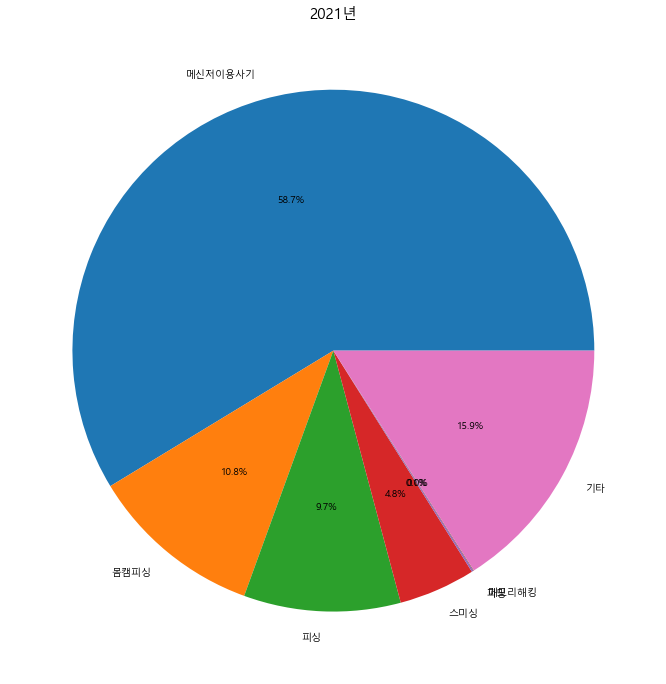

In [9]:
plt.figure(figsize=(12,12))
plt.pie(y1, labels= crime_kind, autopct='%1.1f%%')
plt.title('2021년', fontsize=15)
plt.show()

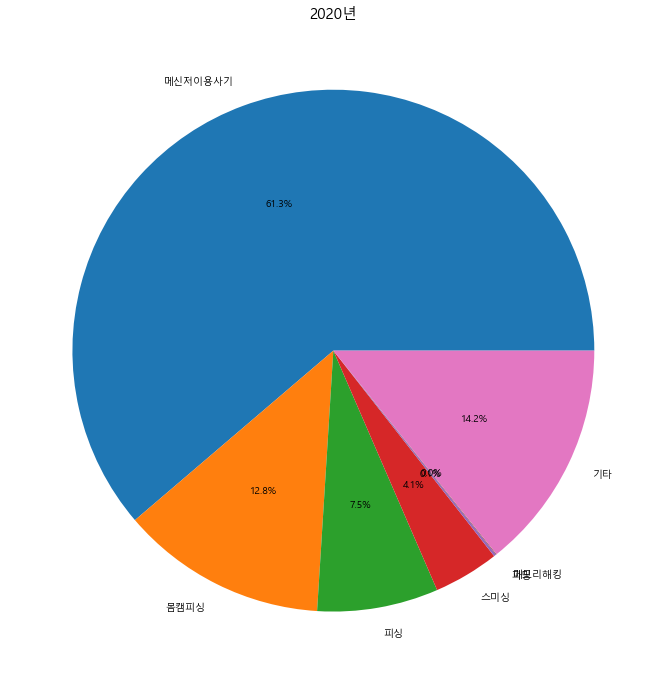

In [10]:
plt.figure(figsize=(12,12))
plt.pie(y2, labels= crime_kind, autopct='%1.1f%%')
plt.title('2020년', fontsize=15)
plt.show()

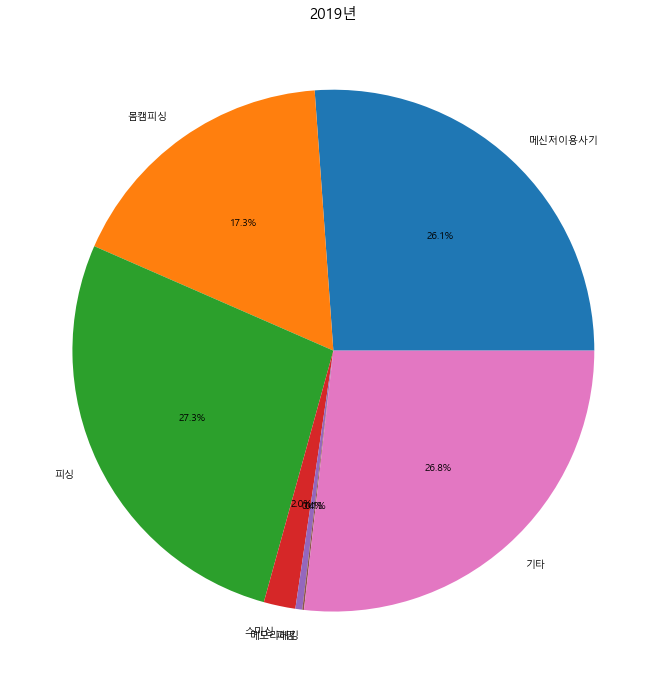

In [11]:
plt.figure(figsize=(12,12))
plt.pie(y3, labels= crime_kind, autopct='%1.1f%%')
plt.title('2019년', fontsize=15)
plt.show()

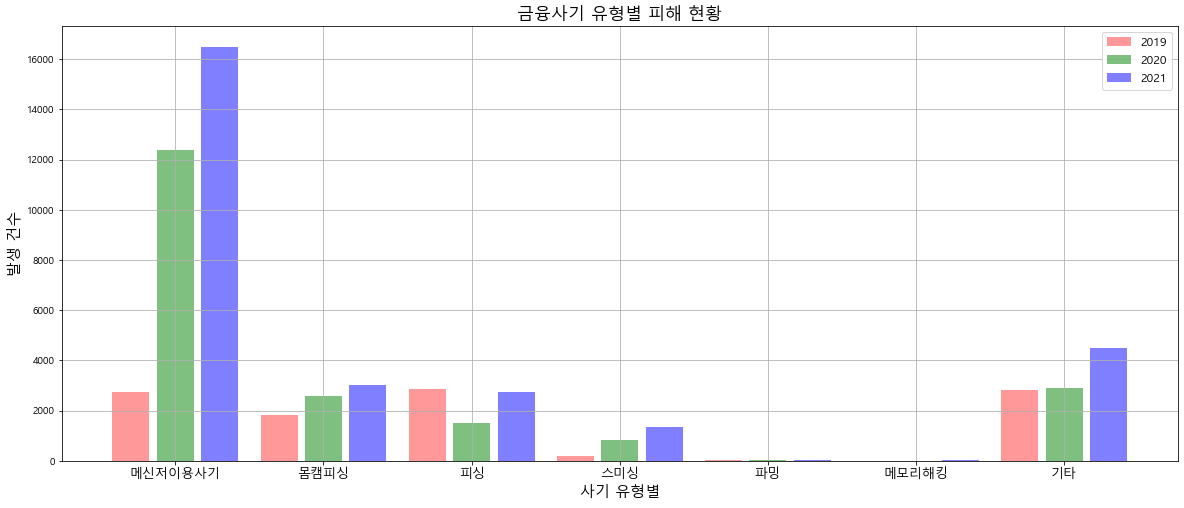

In [12]:
plt.figure(figsize=(20,8))
X = np.arange(len(crime_kind))

plt.bar(X+0.00, y3, color='r',width=0.25, label = '2019',alpha=0.4)
plt.bar(X+0.30, y2, color='g',width=0.25, label = '2020',alpha=0.5)
plt.bar(X+0.60, y1, color='b',width=0.25, label = '2021',alpha=0.5)

plt.grid()
plt.legend(fontsize=12)   
plt.title('금융사기 유형별 피해 현황', fontsize=17)
plt.xlabel('사기 유형별',fontsize=15)
plt.ylabel('발생 건수',fontsize=15)
plt.xticks(X+0.3, crime_kind, fontsize=13)

plt.show()

In [ ]:
'''
파밍, 메모리해킹의 수가 적어 데이터 시각화 불리
메신저 이용사기 피해수가 갈수록 증가해 시각화 후 강조 하면 좋겠음
'''

In [13]:
# 한페이지
def draw_pieplot(param):
    if param == '2019년':
        plt.pie(y3, labels= crime_kind, autopct='%1.1f%%')
        plt.title('2019년\n', fontsize=15)
        plt.legend(loc=1)
        
    elif param == '2020년':
        plt.pie(y2, labels= crime_kind, autopct='%1.1f%%')
        plt.title('2020년\n', fontsize=15)
        plt.legend(loc=1)

    elif param == '2021년':
        plt.pie(y1, labels= crime_kind, autopct='%1.1f%%')
        plt.title('2021년\n', fontsize=15)
        plt.legend(loc=1)
        
    else :
        print("Not Operation !!")
        return

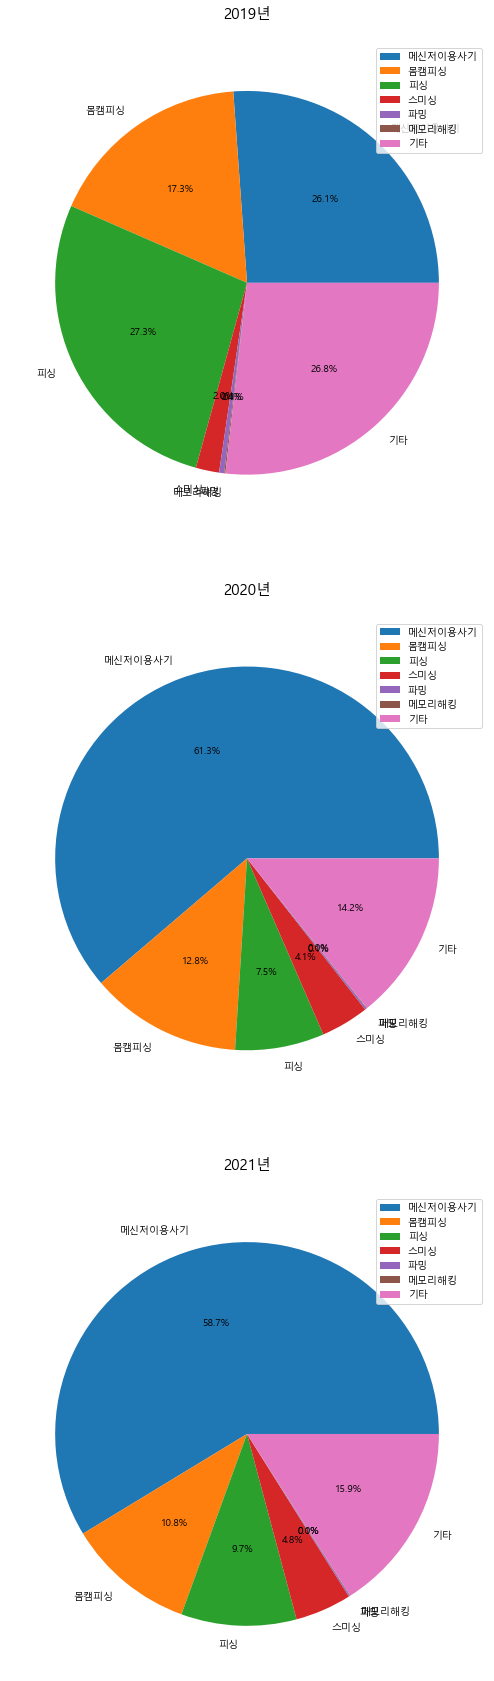

In [14]:
plt.figure(figsize=(30, 30))

plt.subplot(311)
draw_pieplot('2019년')

plt.subplot(312)
draw_pieplot('2020년')

plt.subplot(313)
draw_pieplot('2021년')

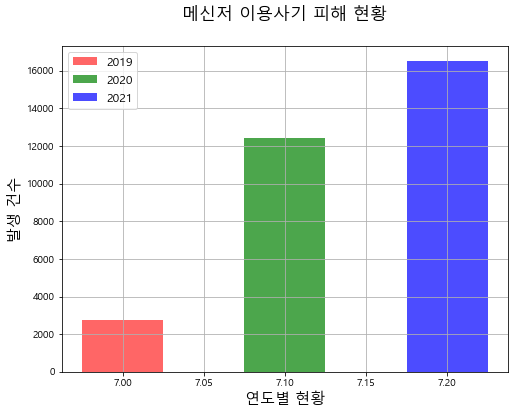

In [35]:
plt.figure(figsize=(8,6))
X = len(crime_kind[0])

plt.bar(X+0.00, y3[0], color='r',width=0.05, label = '2019',alpha=0.6)
plt.bar(X+0.10, y2[0], color='g',width=0.05, label = '2020',alpha=0.7)
plt.bar(X+0.20, y1[0], color='b',width=0.05, label = '2021',alpha=0.7)

plt.grid()
plt.legend(loc=0, fontsize=12)   
plt.title('메신저 이용사기 피해 현황\n', fontsize=17)
plt.xlabel('연도별 현황',fontsize=15)
plt.ylabel('발생 건수',fontsize=15)
plt.show()

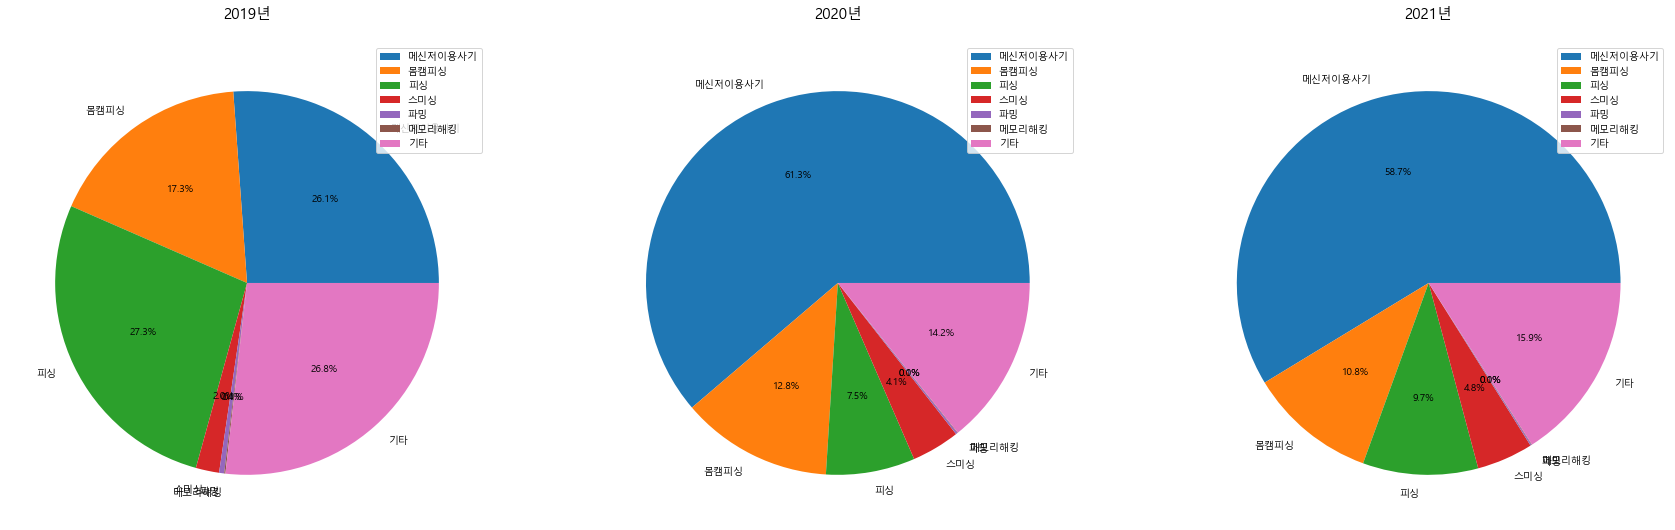

In [32]:
plt.figure(figsize=(30, 30))

plt.subplot(331)
draw_pieplot('2019년')

plt.subplot(332)
draw_pieplot('2020년')

plt.subplot(333)
draw_pieplot('2021년')